In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from fbprophet import Prophet

data = pd.read_csv('../../Data/Modeling/Occupancy.csv')

data.drop(data.columns[[0]], axis=1, inplace=True)

data['date'] = pd.to_datetime(data['date'])
df2 = data.set_index('date')

data.dropna(inplace=True)
data


,date,temperature,humidity,light,co2,humidity_ratio,occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


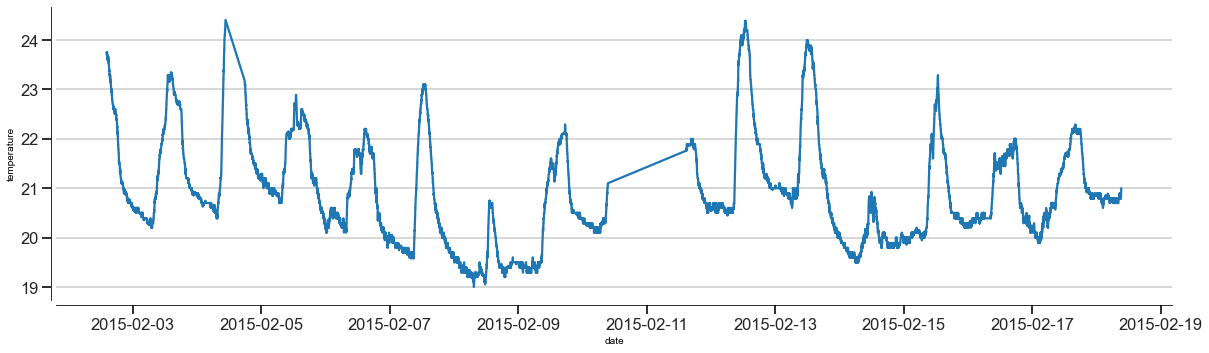

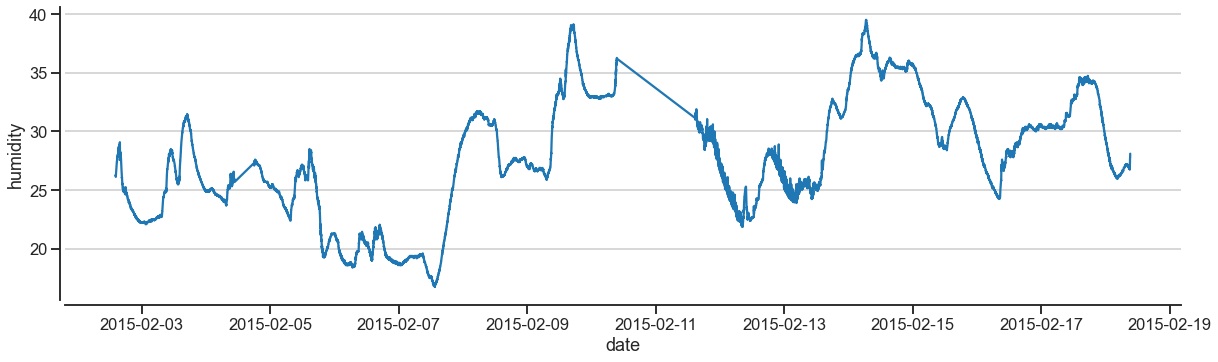

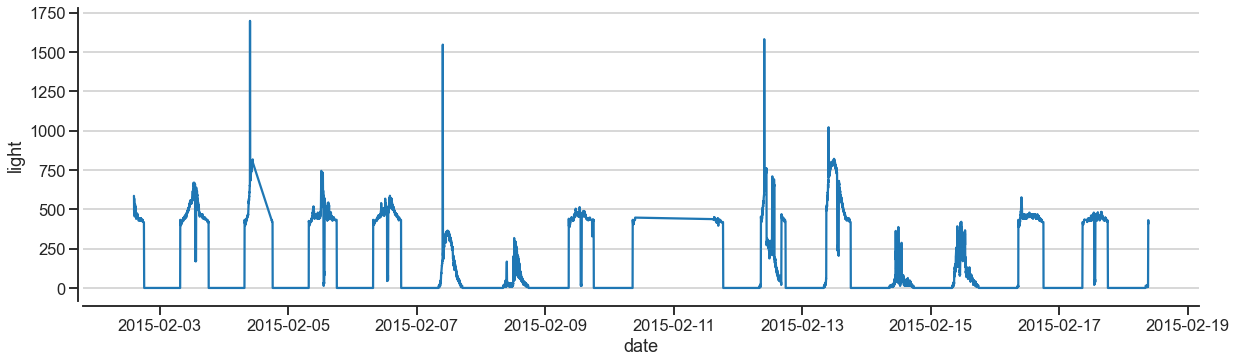

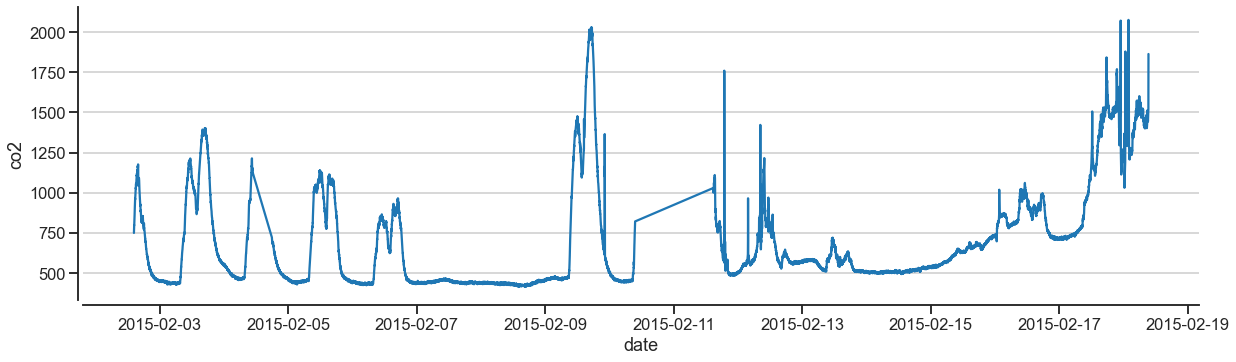

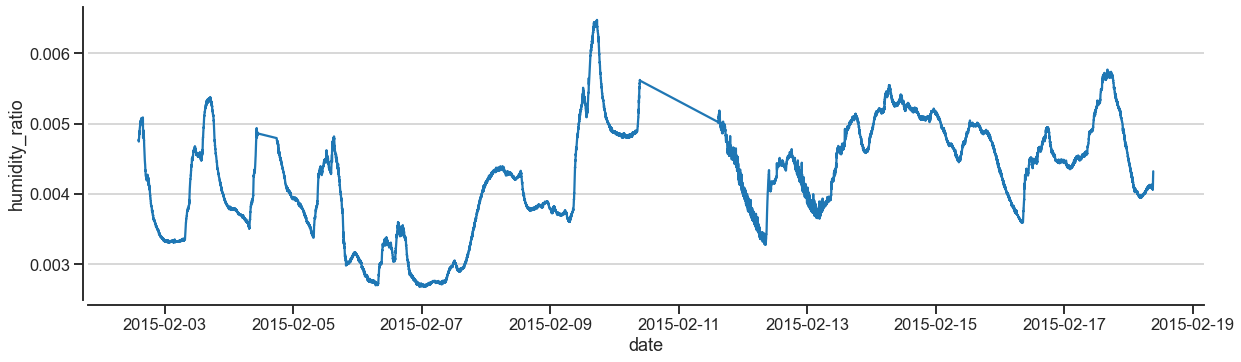

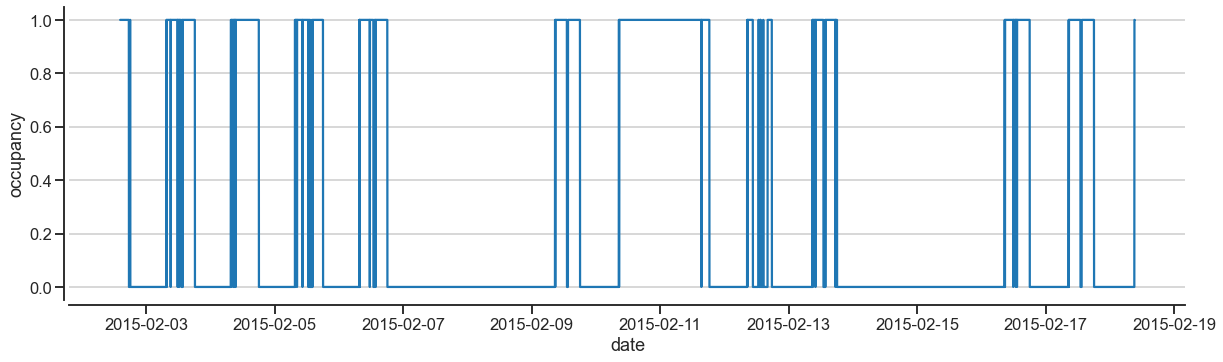

In [2]:
for i, col in enumerate(df2.columns):
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))
    sns.set_style("ticks")
    sns.set_context("talk")
    plt.ylabel(col)
    df2[col].plot(ax=ax)
    ax.yaxis.grid(True)
    sns.despine(offset=5, trim=False)


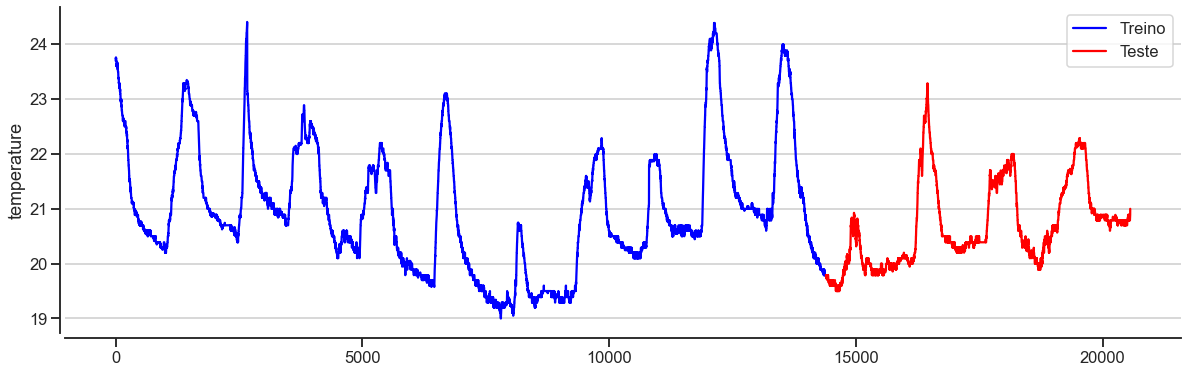

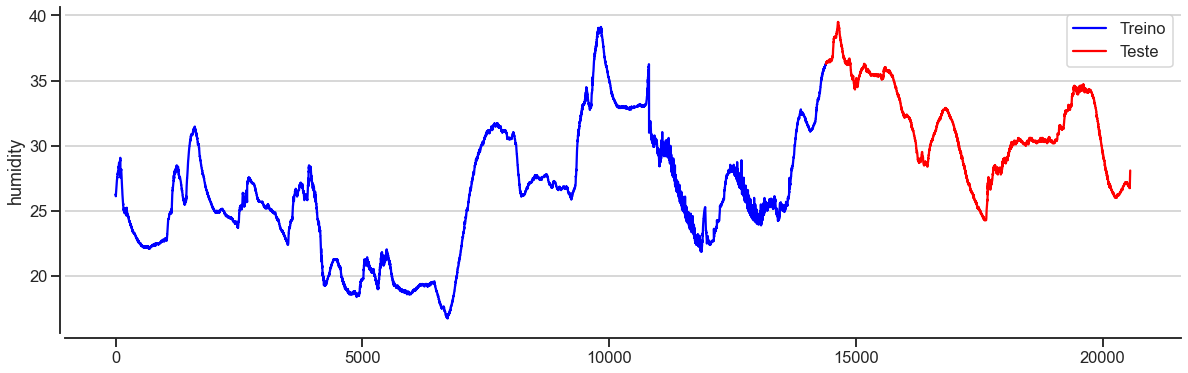

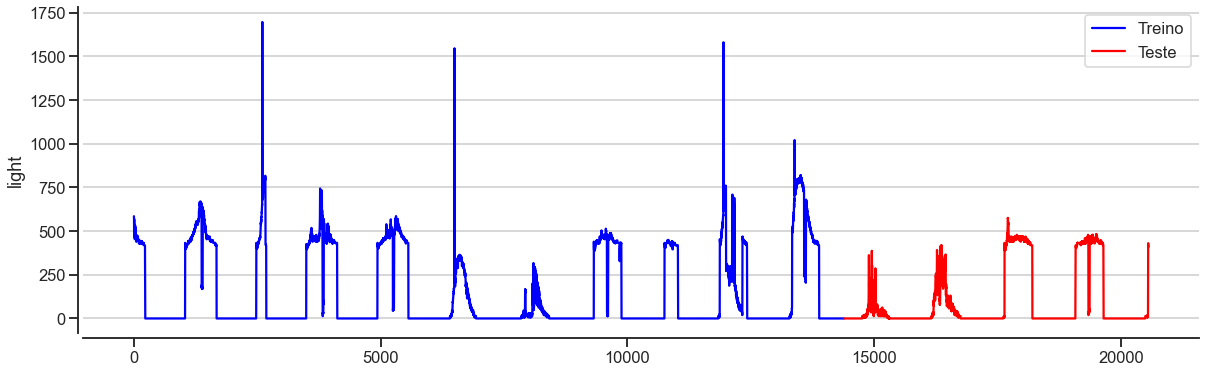

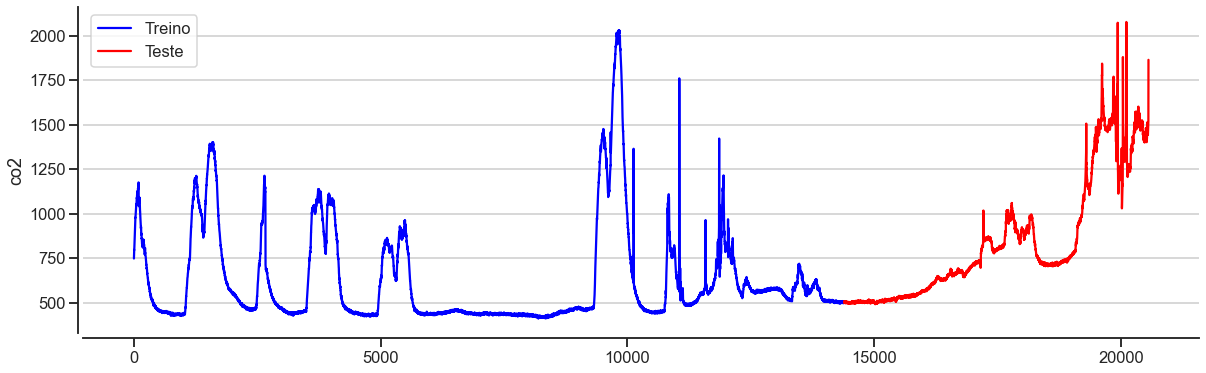

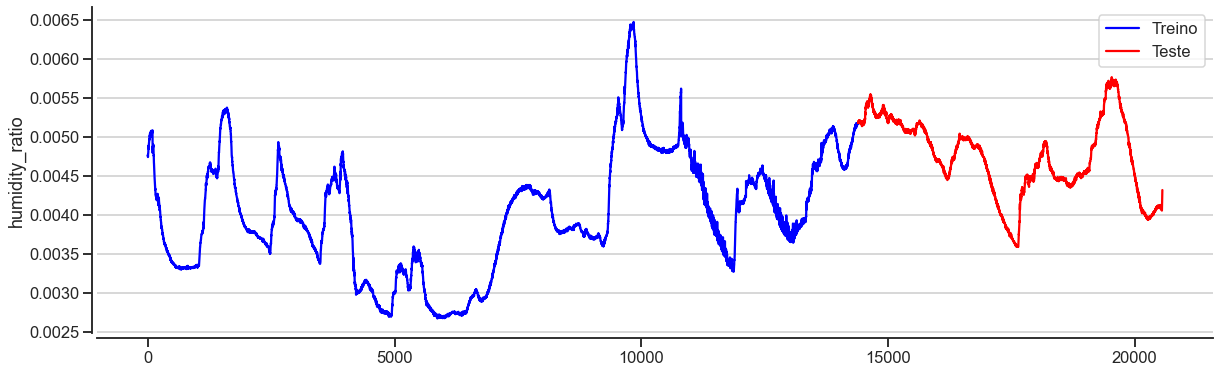

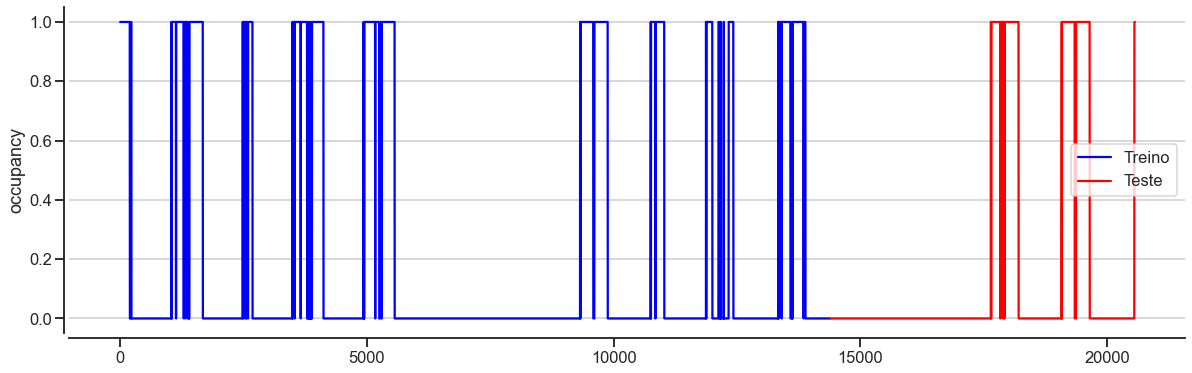

In [3]:
size_of_train = int(np.ceil(data.shape[0] * 0.70))
data_train = data.iloc[:size_of_train]
data_test = data.iloc[size_of_train:]

for i, col in enumerate(df2.columns):
    fig, ax = plt.subplots(1,1,figsize=(20,6))

    data_train[col].plot(ax=ax, c="b")
    data_test[col].plot(ax=ax, c="r")
    sns.set_style("ticks")
    sns.set_context("talk")
    plt.ylabel(col)
    ax.legend(["Treino", "Teste"])
    ax.yaxis.grid(True)
    sns.despine(offset=5, trim=False) 

In [4]:
df = data_train
data_train = data_train.reset_index().rename(columns={'date': 'ds', 'occupancy': 'y'})
data_train

,index,ds,temperature,humidity,light,co2,humidity_ratio,y
0,0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...,...
14387,14387,2015-02-14 02:26:59,19.7900,36.2000,0.000000,501.000000,0.005172,0
14388,14388,2015-02-14 02:28:00,19.7900,36.2000,0.000000,502.000000,0.005172,0
14389,14389,2015-02-14 02:29:00,19.7900,36.2675,0.000000,506.333333,0.005182,0
14390,14390,2015-02-14 02:30:00,19.7900,36.2900,0.000000,510.333333,0.005185,0


In [5]:
model = Prophet(seasonality_mode="multiplicative")
model.add_regressor("co2", standardize=False)
model.add_regressor("light", standardize=False)
model.add_regressor("humidity", standardize=False)
model.add_regressor("temperature", standardize=False)
model.add_regressor("humidity_ratio", standardize=False)

In [6]:
model.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
periods = data.shape[0] - size_of_train
future = model.make_future_dataframe(periods=periods, freq="min")
future

,ds
0,2015-02-02 14:19:00
1,2015-02-02 14:19:59
2,2015-02-02 14:21:00
3,2015-02-02 14:22:00
4,2015-02-02 14:23:00
...,...
20555,2015-02-18 09:15:00
20556,2015-02-18 09:16:00
20557,2015-02-18 09:17:00
20558,2015-02-18 09:18:00


In [8]:
df = df.append(data_test)
df = df.rename(columns={"date": "ds", "occupancy": "y"})
future = df[['ds', 'temperature', 'humidity', 'light', 'co2', 'humidity_ratio']]
future.tail(5)

,ds,temperature,humidity,light,co2,humidity_ratio
20555,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213
20556,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230
20557,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237
20558,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279
20559,2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321


In [9]:
forecast_data = model.predict(future)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
20555,2015-02-18 09:15:00,0.960382,0.769877,1.152316
20556,2015-02-18 09:16:00,0.947207,0.762144,1.151290
20557,2015-02-18 09:16:59,0.946331,0.759410,1.147275
20558,2015-02-18 09:17:59,0.962792,0.770947,1.149258
20559,2015-02-18 09:19:00,0.993035,0.793201,1.180629


In [10]:
final_df = pd.concat((forecast_data['yhat'], data), axis=1)
final_df.tail()

,yhat,date,temperature,humidity,light,co2,humidity_ratio,occupancy
20555,0.960382,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1
20556,0.947207,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1
20557,0.946331,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237,1
20558,0.962792,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279,1
20559,0.993035,2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321,1


<AxesSubplot:>

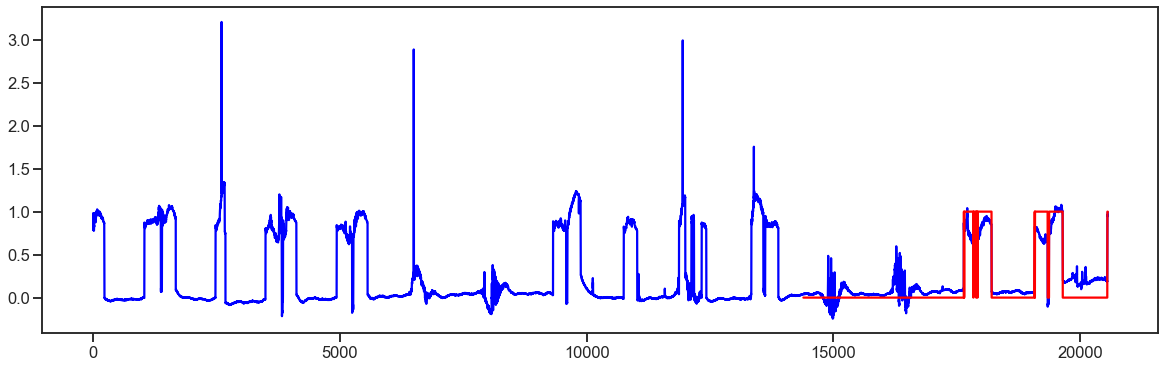

In [11]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
sns.set_style("ticks")
sns.set_context("talk")

# model.plot(forecast_data, ax=ax);
final_df['yhat'].plot(ax=ax, c="b")
data_test['occupancy'].plot(ax=ax, c="r")

In [12]:
data_test

,date,temperature,humidity,light,co2,humidity_ratio,occupancy
14392,2015-02-14 02:31:59,19.790,36.290000,0.00,503.500000,0.005185,0
14393,2015-02-14 02:32:59,19.790,36.290000,0.00,507.000000,0.005185,0
14394,2015-02-14 02:34:00,19.790,36.290000,0.00,503.000000,0.005185,0
14395,2015-02-14 02:35:00,19.790,36.290000,0.00,501.000000,0.005185,0
14396,2015-02-14 02:36:00,19.760,36.363333,0.00,503.666667,0.005186,0
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.815,27.717500,429.75,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.865,27.745000,423.50,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.890,27.745000,423.50,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.890,28.022500,418.75,1632.000000,0.004279,1


In [13]:
yhat_test = forecast_data.yhat[size_of_train:]
yhat_test

print("R2 Score: ", r2_score(data_test['occupancy'], yhat_test))
print("MSE: ", mean_squared_error(data_test['occupancy'], yhat_test))
print("RMSE: ", mean_squared_error(data_test['occupancy'], yhat_test, squared=False))

R2 Score:  0.8458219226942565
MSE:  0.022544163916423044
RMSE:  0.15014714088660844
